In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Foucoult's Pendulum

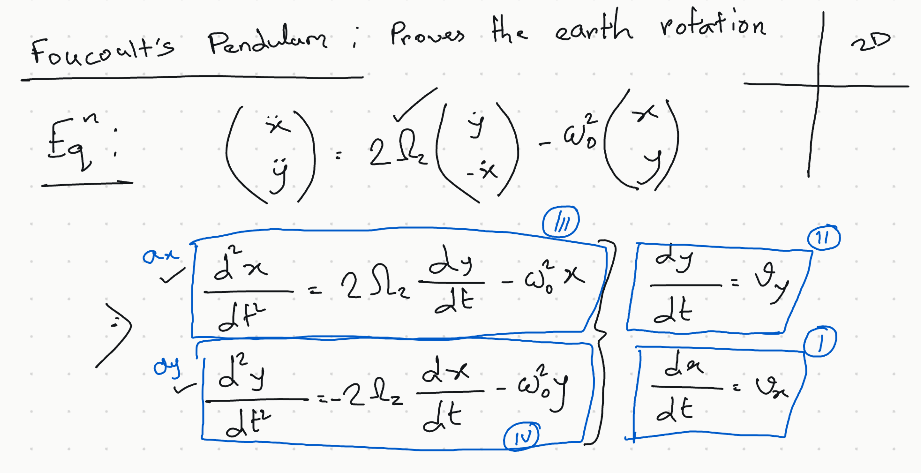

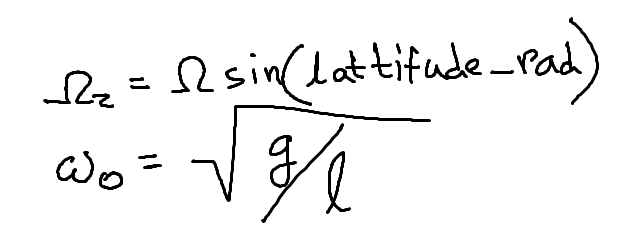

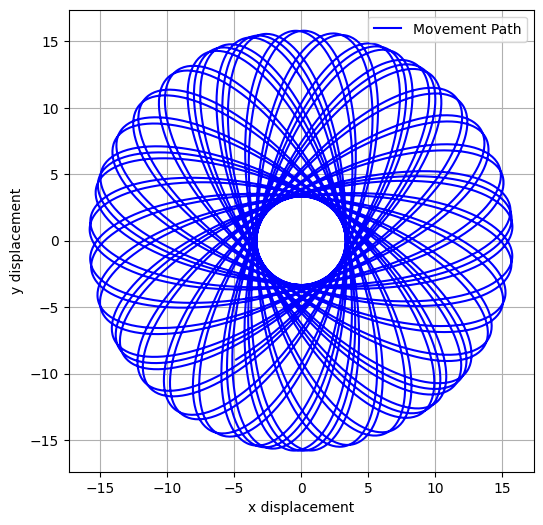

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# given params in question
omega = 7.3e-2 # in Hz
lattitude_deg = 55
lat_rad = lattitude_deg/180.0*np.pi
g = 9.81 # if they really say it
length = 50

# define params
OMEGA_Z = omega*np.sin(lat_rad)
omega0 = np.sqrt(g/length)


# init_val and time
init_val = [5, 5, 0, -5] # in the order of x, vx, y, vy
t = np.linspace(0, 500, 10001)

def FoucoultsPendulum (X, t):
    x, vx, y, vy = X

    dxdt = vx
    dydt = vy
    dvxdt = 2*OMEGA_Z*dydt - omega0**2*x
    dvydt = -2*OMEGA_Z*dxdt - omega0**2*y

    return [dxdt, dvxdt, dydt, dvydt]


# solve
sol = odeint(FoucoultsPendulum, init_val, t)
x, vx, y, vy = sol.T


plt.figure(figsize=(6,6))

# movement path in a 2d plane
plt.plot(x, y, 'b', label='Movement Path')
plt.xlabel('x displacement')
plt.ylabel('y displacement')
plt.grid()
plt.legend()
plt.savefig('Movement Path - Foucoults Pendulum', dpi=300)
plt.show()

# Task1

**Plot displacement (x, y) and velocity (vx, vy) w.r.t. time in a 1 by 2 subplot.**

# Projectile motion in real life: Thrown Stone!

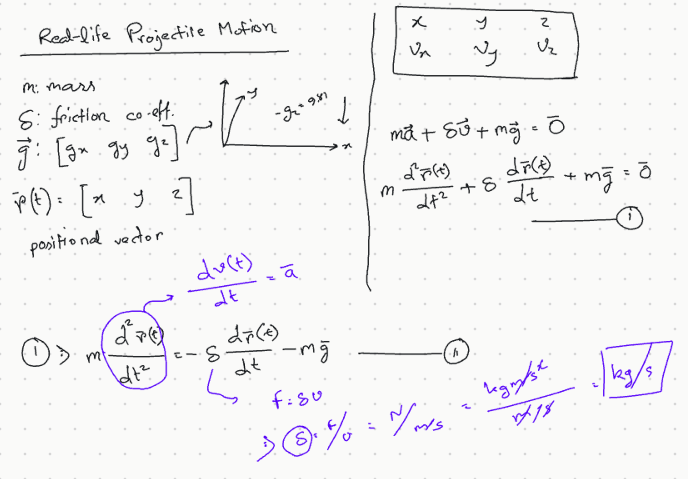

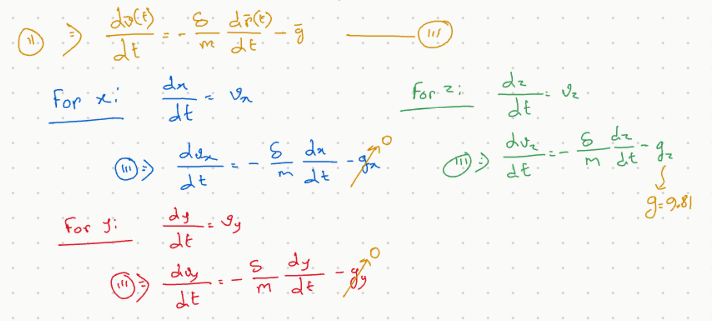

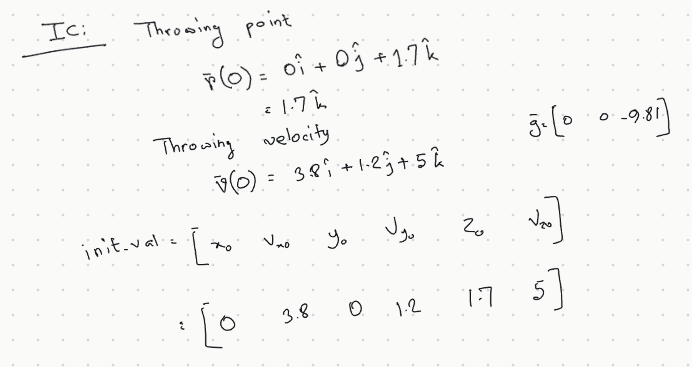

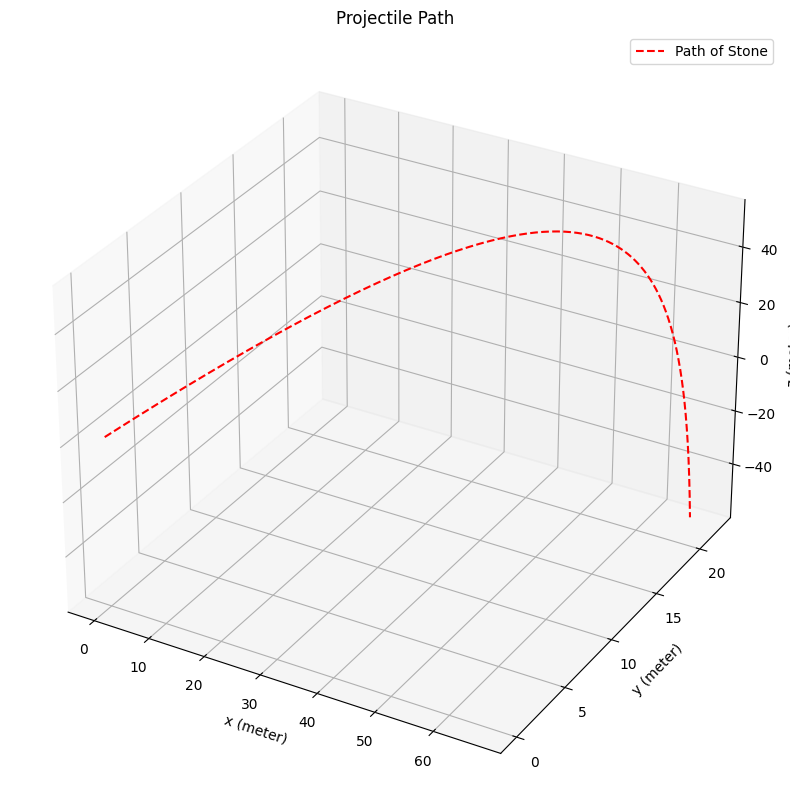

In [22]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D


# params
g = 9.81 # in m/s^2
m = 1.2 # in kg
delta = 0.55 # in kg/s


# initial conditions
trajectoryInit = [0, 30.8, 0, 10.2, 1.7, 50]
t = np.linspace(0, 10, 501)


# projectile func
def projectile(X, t):
    x, vx, y, vy, z, vz = X

    dxdt = vx
    dydt = vy
    dzdt = vz

    dvxdt = -(delta/m)*dxdt
    dvydt = -(delta/m)*dydt
    dvzdt = -(delta/m)*dzdt - g

    return [dxdt, dvxdt, dydt, dvydt, dzdt, dvzdt]

# solve
sol = odeint(projectile, trajectoryInit, t)
x, vx, y, vy, z, vz = sol.T

# plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, 'r--', label='Path of Stone')
ax.set_xlabel('x (meter)')
ax.set_ylabel('y (meter)')
ax.set_zlabel('z (meter)')
ax.set_title('Projectile Path')
ax.grid()
ax.legend(loc='best')
plt.show()